<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 6: Data Processing & Cleaning for Data Science: Data Wrangling Documents and Web Scraping

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Wrangling Documents and Web Scraping. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 6.

## Parsing and Processing Text Documents

### Challenge 1: 
Given the text shown in the code below, you are asked to do the basic parsing and processing text operations checklist seen in the lecture (Slides 4-9) to provide a basic text analysis report.

``` python
import string

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
```

`Hint:`
These are some of the basic text analysis operations

* Reading & Extracting Texts
*  Basic Text Cleaning:
    * Removing unnecessary punctuation, tags
    * Tokenization
    * Removing stop words
* Basic words Analysis

In [64]:
import string
import textract
doc_text="challenge1.docx"
text=textract.process(doc_text)
test1=text.decode("utf-8")   
print(test1[0:200])


Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-maki


In [65]:
import string
translator = str.maketrans('', '', string.punctuation + string.digits)
text = test1.translate(translator)
print(text)

Data science incorporates tools from multiple disciplines to gather a data set process and derive insights from the data set extract meaningful data from the set and interpret it for decisionmaking purposes 

The disciplinary areas that make up the data science field include mining statistics machine learning analytics and programming



Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set 

Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past



Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time

Using analytics

In [66]:
import nltk
tokens = nltk.word_tokenize(test1)
print(tokens)

['Data', 'science', 'incorporates', 'tools', 'from', 'multiple', 'disciplines', 'to', 'gather', 'a', 'data', 'set', ',', 'process', ',', 'and', 'derive', 'insights', 'from', 'the', 'data', 'set', ',', 'extract', 'meaningful', 'data', 'from', 'the', 'set', ',', 'and', 'interpret', 'it', 'for', 'decision-making', 'purposes', '.', 'The', 'disciplinary', 'areas', 'that', 'make', 'up', 'the', 'data', 'science', 'field', 'include', 'mining', ',', 'statistics', ',', 'machine', 'learning', ',', 'analytics', ',', 'and', 'programming', '.', 'Data', 'mining', 'applies', 'algorithms', 'to', 'the', 'complex', 'data', 'set', 'to', 'reveal', 'patterns', 'that', 'are', 'then', 'used', 'to', 'extract', 'useful', 'and', 'relevant', 'data', 'from', 'the', 'set', '.', 'Statistical', 'measures', 'or', 'predictive', 'analytics', 'use', 'this', 'extracted', 'data', 'to', 'gauge', 'events', 'that', 'are', 'likely', 'to', 'happen', 'in', 'the', 'future', 'based', 'on', 'what', 'the', 'data', 'shows', 'happened

In [67]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords]
print(words)

['data', 'science', 'incorporates', 'tools', 'multiple', 'disciplines', 'gather', 'data', 'set', 'process', 'derive', 'insights', 'data', 'set', 'extract', 'meaningful', 'data', 'set', 'interpret', 'decisionmaking', 'purposes', 'disciplinary', 'areas', 'make', 'data', 'science', 'field', 'include', 'mining', 'statistics', 'machine', 'learning', 'analytics', 'programming', 'data', 'mining', 'applies', 'algorithms', 'complex', 'data', 'set', 'reveal', 'patterns', 'used', 'extract', 'useful', 'relevant', 'data', 'set', 'statistical', 'measures', 'predictive', 'analytics', 'use', 'extracted', 'data', 'gauge', 'events', 'likely', 'happen', 'future', 'based', 'data', 'shows', 'happened', 'past', 'machine', 'learning', 'artificial', 'intelligence', 'tool', 'processes', 'mass', 'quantities', 'data', 'human', 'would', 'unable', 'process', 'lifetime', 'machine', 'learning', 'perfects', 'decision', 'model', 'presented', 'predictive', 'analytics', 'matching', 'likelihood', 'event', 'happening', 'a

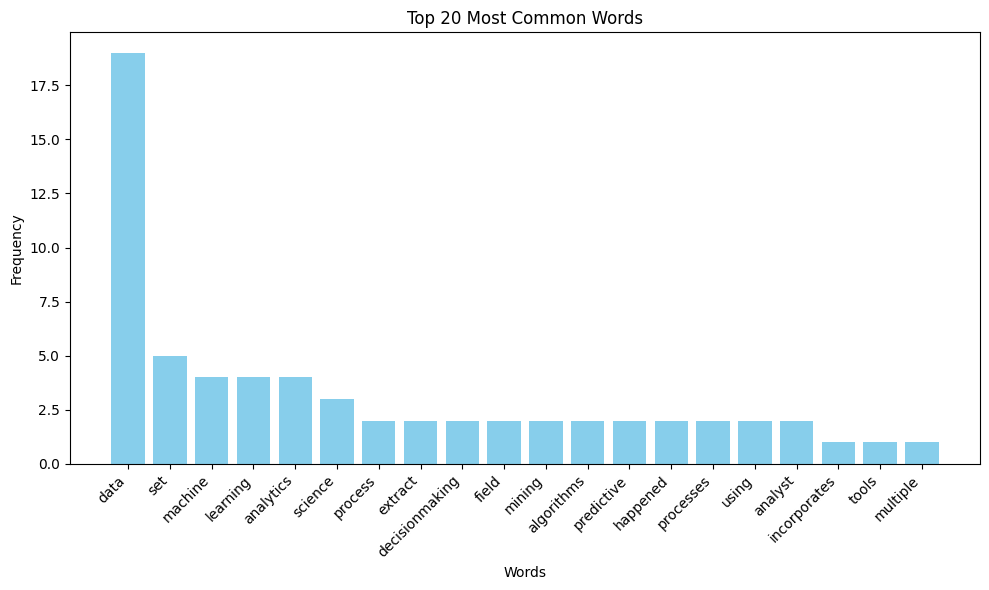

In [68]:
cnt_fdist = nltk.FreqDist(words)
most_common_words = cnt_fdist.most_common(20)
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words")
plt.tight_layout()
plt.show()

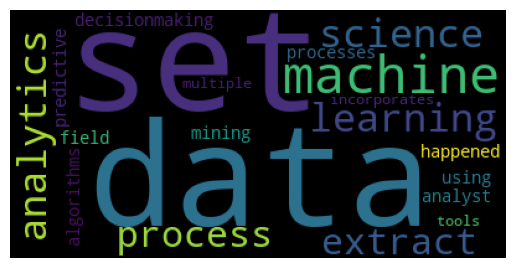

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(collocations=False).generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

### Challenge 2:
You've just started a new data science position at the Cybersecurity Unit of the U.S. DEPARTMENT OF COMMERCE. The department wants to build, test, and evaluate new machine learning model using thier 2020 annual report document availabe in the local data folder:`2020_Cybersecurity_and_Privacy_Annual_Re.docx`. 

You are asked to provide a visual report summarizing the most common frequency keywords used in their report. 



In [70]:
import string
from glob import glob
import textract
world_files=glob("data/2020_Cybersecurity_and_Privacy_Annual_Re*.docx")
txt=textract.process(world_files[0])
test=txt.decode("utf-8")   
print(test[0:30])

1 | Cybersecurity Awareness an


In [71]:

translator = str.maketrans('', '', string.punctuation + string.digits)
text = test.translate(translator)
print(text)

  Cybersecurity Awareness and Education


















Cybersecurity and Privacy Annual Report

















































































































NIST SPECIAL PUBLICATION 



 Cybersecurity and

Privacy Annual Report











PATRICK O’REILLY EDITOR

Computer Security Division Information Technology Laboratory


KRISTINA RIGOPOULOS EDITOR

Applied Cybersecurity Division Information Technology Laboratory







COEDITORS

Larry Feldman Greg Witte

Huntington Ingalls Industries Annapolis Junction Maryland















THIS PUBLICATION IS AVAILABLE FREE OF CHARGE FROM

httpsdoiorgNISTSP



SEPTEMBER 











US DEPARTMENT OF COMMERCE Gina M Raimondo Secretary



NATIONAL INSTITUTE OF STANDARDS AND TECHNOLOGY

James K Olthoff Performing the NonExclusive Functions and Duties of the Under Secretary of Commerce for Standards and Technology  Director National Institute of Standards and Technology



Table of Contents

	For

In [72]:
tokens = nltk.word_tokenize(text)
print(tokens)

['Cybersecurity', 'Awareness', 'and', 'Education', 'Cybersecurity', 'and', 'Privacy', 'Annual', 'Report', 'NIST', 'SPECIAL', 'PUBLICATION', 'Cybersecurity', 'and', 'Privacy', 'Annual', 'Report', 'PATRICK', 'O', '’', 'REILLY', 'EDITOR', 'Computer', 'Security', 'Division', 'Information', 'Technology', 'Laboratory', 'KRISTINA', 'RIGOPOULOS', 'EDITOR', 'Applied', 'Cybersecurity', 'Division', 'Information', 'Technology', 'Laboratory', 'COEDITORS', 'Larry', 'Feldman', 'Greg', 'Witte', 'Huntington', 'Ingalls', 'Industries', 'Annapolis', 'Junction', 'Maryland', 'THIS', 'PUBLICATION', 'IS', 'AVAILABLE', 'FREE', 'OF', 'CHARGE', 'FROM', 'httpsdoiorgNISTSP', 'SEPTEMBER', 'US', 'DEPARTMENT', 'OF', 'COMMERCE', 'Gina', 'M', 'Raimondo', 'Secretary', 'NATIONAL', 'INSTITUTE', 'OF', 'STANDARDS', 'AND', 'TECHNOLOGY', 'James', 'K', 'Olthoff', 'Performing', 'the', 'NonExclusive', 'Functions', 'and', 'Duties', 'of', 'the', 'Under', 'Secretary', 'of', 'Commerce', 'for', 'Standards', 'and', 'Technology', 'Dire

In [73]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords]
print(words)

['cybersecurity', 'awareness', 'education', 'cybersecurity', 'privacy', 'annual', 'report', 'nist', 'special', 'publication', 'cybersecurity', 'privacy', 'annual', 'report', 'patrick', 'o’reilly', 'editor', 'computer', 'security', 'division', 'information', 'technology', 'laboratory', 'kristina', 'rigopoulos', 'editor', 'applied', 'cybersecurity', 'division', 'information', 'technology', 'laboratory', 'coeditors', 'larry', 'feldman', 'greg', 'witte', 'huntington', 'ingalls', 'industries', 'annapolis', 'junction', 'maryland', 'publication', 'available', 'free', 'charge', 'httpsdoiorgnistsp', 'september', 'us', 'department', 'commerce', 'gina', 'raimondo', 'secretary', 'national', 'institute', 'standards', 'technology', 'james', 'k', 'olthoff', 'performing', 'nonexclusive', 'functions', 'duties', 'secretary', 'commerce', 'standards', 'technology', 'director', 'national', 'institute', 'standards', 'technology', 'table', 'contents', 'foreword', 'focus', 'area', 'cybersecurity', 'awareness'

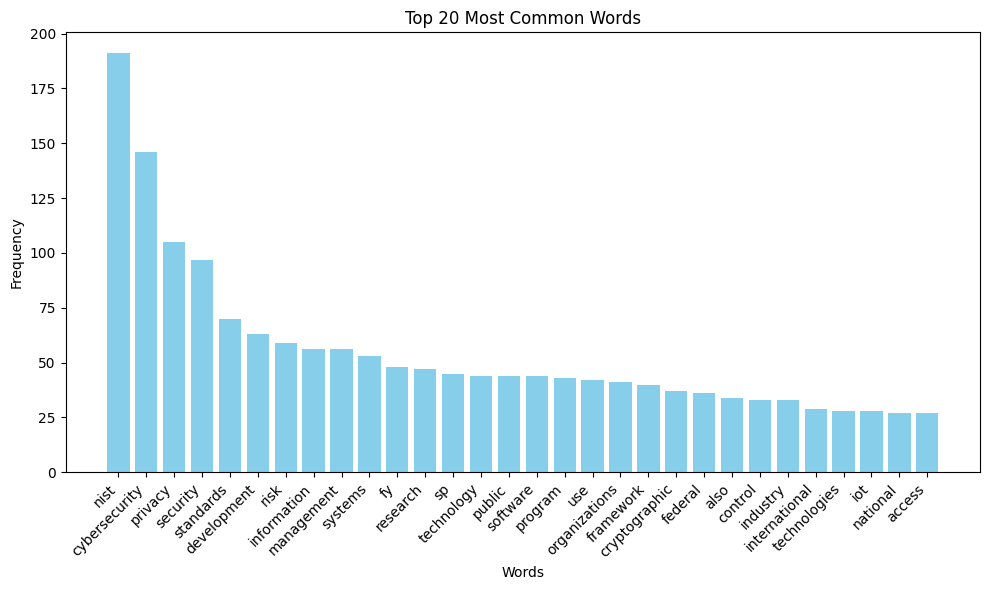

In [74]:
cnt_fdist = nltk.FreqDist(words)
most_common_words = cnt_fdist.most_common(30)
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words")
plt.tight_layout()
plt.show()

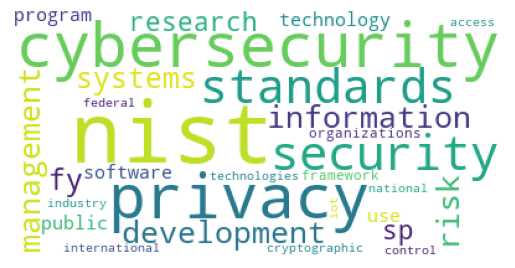

In [75]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False,background_color='white').generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

## Web Scraping: Parsing and processing Web Pages
### Challenge 3:
We want to analyse text collected from https://en.wikipedia.org/wiki/Data_science  wikipedia page. We are only interested on the text content of links html anchor (`a`).  

1. Do the cheklist basic text analyses to provid a visyal summarry of all href text links available on the page.

`Hint:`
1. Follow and adjust the procedures in Lecture 6 - Slides: 14-16 - to collect the required text. In case, you have not figured out how to collect the required information, here is below a code that help you:


``` python
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import lxml

url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

soup = bs(page)

links = soup.find_all('a')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text
``` 

2. Follow the checklist text analysis to clean and visualize the most common words used in the collected text.

### Challenge 4:
We want to analyse text related to data science topic collected from different web pages: https://www.heavy.ai/learn/data-science,  https://en.wikipedia.org/wiki/Data_science, https://www.ibm.com/cloud/learn/data-science-introduction, and https://deepai.org/machine-learning-glossary-and-terms/data-science alongside with the text string object of challenge 01.

Note that we are only interested on the text content of  html anchor (`p`) from the webpages.  

1. Do the required procedures to collect all  `p` text available on all of the aformentioned web pages.
2. Append the collected text with the text string object of challenge 01
3. Do the cheklist basic text analyses to provid a visyal summarry of the most frequently used keywords on the resulted text.



In [76]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import lxml

url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

soup = bs(page)

links = soup.find_all('a')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text

'Jump to content Main page Contents Current events Random article About Wikipedia Contact us Help Learn to edit Community portal Recent changes Upload file \n\n\n\n\n\n \nSearch\n Donate Create account Log in Donate  Create account  Log in learn more Contributions Talk \n(Top)\n \n\n1\nFoundations\n\n \n\n1.1\nRelationship to statistics\n\n \n\n2\nEtymology\n\n \n\n2.1\nEarly usage\n\n \n\n2.2\nModern usage\n\n \n\n3\nData science and data analysis\n\n \n\n4\nCloud computing for data science\n\n \n\n5\nEthical consideration in data science\n\n \n\n6\nSee also\n\n \n\n7\nReferences\n\n العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 Norsk bokmål ਪੰਜਾਬੀ Polski Português Runa Simi Русский Simple English Српски / srpski Suomi தமிழ் ไทย Türkçe Українська اردو Tiếng Việt 粵語 中文 Edit links

In [77]:
import string
txtx=str.maketrans('','',string.punctuation + string.digits)
text=text.translate(txtx)
print(text)

Jump to content Main page Contents Current events Random article About Wikipedia Contact us Help Learn to edit Community portal Recent changes Upload file 





 
Search
 Donate Create account Log in Donate  Create account  Log in learn more Contributions Talk 
Top
 


Foundations

 


Relationship to statistics

 


Etymology

 


Early usage

 


Modern usage

 


Data science and data analysis

 


Cloud computing for data science

 


Ethical consideration in data science

 


See also

 


References

 العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 Norsk bokmål ਪੰਜਾਬੀ Polski Português Runa Simi Русский Simple English Српски  srpski Suomi தமிழ் ไทย Türkçe Українська اردو Tiếng Việt 粵語 中文 Edit links Article Talk Read Edit View history Read Edit View history What links here Rela

In [78]:
import nltk
tokens = nltk.word_tokenize(text)
print(tokens)


['Jump', 'to', 'content', 'Main', 'page', 'Contents', 'Current', 'events', 'Random', 'article', 'About', 'Wikipedia', 'Contact', 'us', 'Help', 'Learn', 'to', 'edit', 'Community', 'portal', 'Recent', 'changes', 'Upload', 'file', 'Search', 'Donate', 'Create', 'account', 'Log', 'in', 'Donate', 'Create', 'account', 'Log', 'in', 'learn', 'more', 'Contributions', 'Talk', 'Top', 'Foundations', 'Relationship', 'to', 'statistics', 'Etymology', 'Early', 'usage', 'Modern', 'usage', 'Data', 'science', 'and', 'data', 'analysis', 'Cloud', 'computing', 'for', 'data', 'science', 'Ethical', 'consideration', 'in', 'data', 'science', 'See', 'also', 'References', 'العربية', 'Azərbaycanca', 'বাংলা', 'Български', 'Català', 'Čeština', 'Deutsch', 'Eesti', 'Ελληνικά', 'Español', 'Esperanto', 'Euskara', 'فارسی', 'Français', 'Galego', '한국어', 'Հայերեն', 'हिन्दी', 'Bahasa', 'Indonesia', 'IsiZulu', 'Italiano', 'עברית', 'ಕನ್ನಡ', 'Қазақша', 'Latviešu', 'Македонски', 'Bahasa', 'Melayu', 'မြန်မာဘာသာ', 'Nederlands', '日本

['jump', 'content', 'main', 'page', 'contents', 'current', 'events', 'random', 'article', 'wikipedia', 'contact', 'us', 'help', 'learn', 'edit', 'community', 'portal', 'recent', 'changes', 'upload', 'file', 'search', 'donate', 'create', 'account', 'log', 'donate', 'create', 'account', 'log', 'learn', 'contributions', 'talk', 'top', 'foundations', 'relationship', 'statistics', 'etymology', 'early', 'usage', 'modern', 'usage', 'data', 'science', 'data', 'analysis', 'cloud', 'computing', 'data', 'science', 'ethical', 'consideration', 'data', 'science', 'see', 'also', 'references', 'العربية', 'azərbaycanca', 'বাংলা', 'български', 'català', 'čeština', 'deutsch', 'eesti', 'ελληνικά', 'español', 'esperanto', 'euskara', 'فارسی', 'français', 'galego', '한국어', 'հայերեն', 'हिन्दी', 'bahasa', 'indonesia', 'isizulu', 'italiano', 'עברית', 'ಕನ್ನಡ', 'қазақша', 'latviešu', 'македонски', 'bahasa', 'melayu', 'မြန်မာဘာသာ', 'nederlands', '日本語', 'norsk', 'bokmål', 'ਪੰਜਾਬੀ', 'polski', 'português', 'runa', 'si

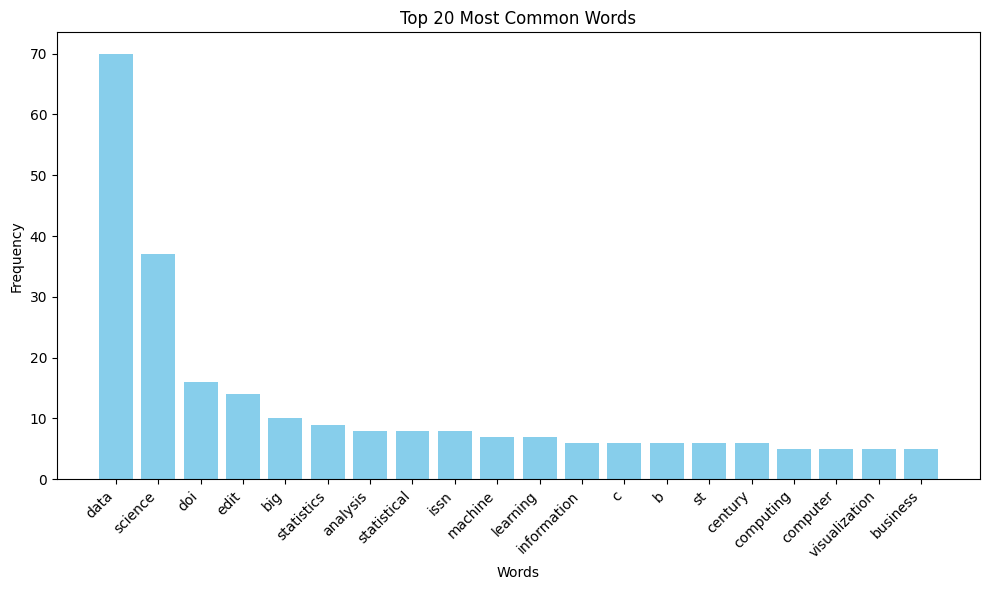

In [79]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords]
print(words)
cnt_fdist = nltk.FreqDist(words)
most_common_words = cnt_fdist.most_common(20)
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_49980\1071772737.py:75: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_49980\1071772737.py:75: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()


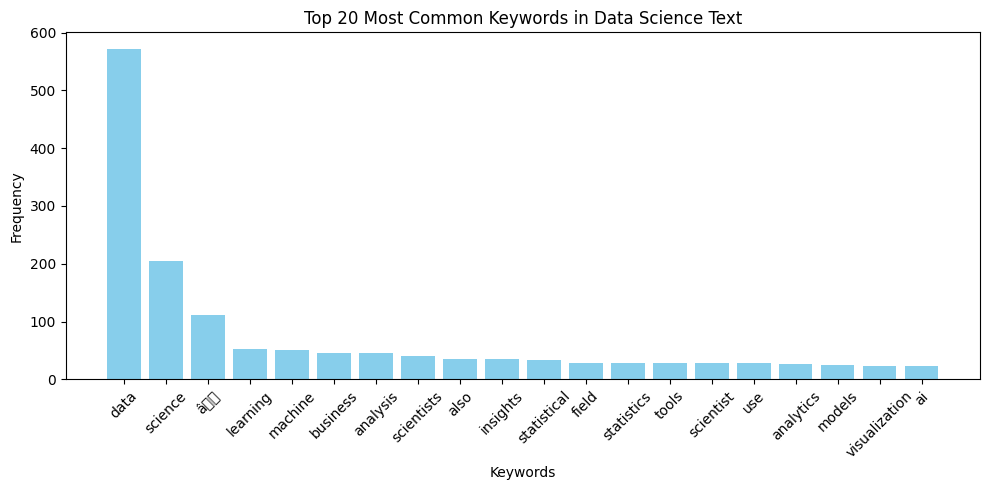

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_49980\1071772737.py:85: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_49980\1071772737.py:85: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()


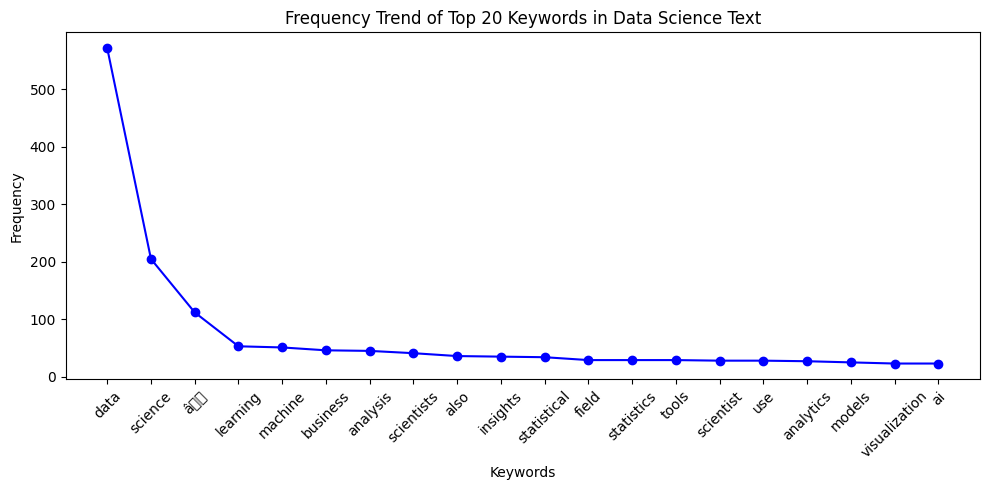

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string


# List of URLs to scrape
urls = [
    "https://www.heavy.ai/learn/data-science",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://www.ibm.com/cloud/learn/data-science-introduction",
    "https://deepai.org/machine-learning-glossary-and-terms/data-science"
]


def get_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    paragraphs = soup.find_all('p')
    text_content = ' '.join([para.get_text() for para in paragraphs])
    return text_content


collected_text = ""
for url in urls:
    collected_text += get_text_from_url(url) + " "


challenge01_text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.
Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set.
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.
Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms.
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
collected_text += challenge01_text


collected_text = collected_text.lower()


translator = str.maketrans('', '', string.punctuation + string.digits)
collected_text = collected_text.translate(translator)


words = nltk.word_tokenize(collected_text)


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]


fdist = FreqDist(filtered_words)
most_common_words = fdist.most_common(20)


words, frequencies = zip(*most_common_words)



# 1. Bar plot
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Keywords in Data Science Text")
plt.tight_layout()
plt.show()

# 2. Line plot for trend visualization
plt.figure(figsize=(10, 5))
plt.plot(words, frequencies, marker='o',  color='blue')
plt.xticks(rotation=45)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Frequency Trend of Top 20 Keywords in Data Science Text")
plt.tight_layout()
plt.show()


### Challenge 4:

You're in the initial stages of a new position as a Data Scientist at Goodreads (https://www.goodreads.com/) company. Your primary task is to build a robust understanding of customer sentiments and preferences related to quots, focusing on the `Motivational` tag.

The team you're collaborating with has a specific interest in quotes text, authors or Book titles, tags, and number of likes  from the `Motivational` tag on Goodreads as shown in the figure. They've tasked you with conducting web scraping and basic text analysis on quotes from this category. Your goal is to provide insights into the most frequently occurring keywords by author, or book title, or keyword tags.


<figure>
  <IMG src="figures/goodbooks.png"  ALIGN="right">
</figure>

#### II.  Requirements:

##### 1. Web Scraping and data collection:

1. Scraping the the required contents from the two following first 5 pages:
  *  https://www.goodreads.com/quotes/tag/motivational?page=1
  *  https://www.goodreads.com/quotes/tag/motivational?page=2
  *  https://www.goodreads.com/quotes/tag/motivational?page=3
  *  https://www.goodreads.com/quotes/tag/motivational?page=4
  *  https://www.goodreads.com/quotes/tag/motivational?page=5
  
2. Store the scraped data in a dataframe with the approporiat columns names 
##### 2. Text Analysis:

1. Performing basic text analysis and generate a visulaization report on:
  - The overall quot texts of the entire dataframe to identify the most common frequency keywords.
  - The quot texts by author or book title, or tag
2. Using the apropriate chart type, Visualize the number of likes  by author or booktitle or by tag.




### Hints:
1- Consider using the Browser Dev. Tools for further assistance and html componenets inspections to identify the appropriat related contents html css classes and tags.For example, each quote detail text is displayed in an html markup `div` with class name: `quoteText`.
You may get any `<html_markup_name>` contents for a specific class name by using the following code: 
``` python
soup.find_all("<html_markup_name>", {"class": "<class_name>"})
```






In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize lists to store the scraped data
quotes = []
authors = []
book_titles = []
tags = []
likes = []

# Set up headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Loop through the first 5 pages of quotes with the 'Motivational' tag
for page_num in range(1, 6):
    url = f"https://www.goodreads.com/quotes/tag/motivational?page={page_num}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find each quote box
    quote_boxes = soup.find_all("div", {"class": "quoteDetails"})
    
    # # Debugging: Print the content of the first few quote boxes to verify structure
    # if page_num == 1:
    #     for i, box in enumerate(quote_boxes[:3]):  # Only print first few for checking
    #         print(f"Quote Box {i+1}:", box.prettify())
    
    # Extract data from each quote box
    for box in quote_boxes:
        # Extract quote text
        quote_text = box.find("div", {"class": "quoteText"})
        if quote_text:
            quote_text_cleaned = quote_text.get_text(separator=" ", strip=True).split("\n")[0]
            quotes.append(quote_text_cleaned)
        else:
            quotes.append("")

        # Extract author
        author = box.find("span", {"class": "authorOrTitle"})
        authors.append(author.get_text(strip=True) if author else "Unknown")
        
        # Extract book title, if available
        book_title = box.find("a", {"class": "authorOrTitle"})
        book_titles.append(book_title.get_text(strip=True) if book_title else "Unknown")
        
        # Extract tags
        tag_list = box.find("div", {"class": "greyText smallText left"})
        tags.append(tag_list.get_text(strip=True).replace("tags:", "").strip() if tag_list else "No tags")
        
        # Extract number of likes, if available
        like_box = box.find("a", {"class": "smallText"})
        like_count = int(like_box.get_text(strip=True).replace("likes", "").strip()) if like_box else 0
        likes.append(like_count)
    
    # Delay to avoid getting blocked
    time.sleep(2)


data = pd.DataFrame({
    "Quote": quotes,
    "Author": authors,
    "Book_Title": book_titles,
    "Tags": tags,
    "Likes": likes
})


print(data.head())


data.to_csv("motivational_quotes.csv", index=False)
print("Data has been saved to motivational_quotes.csv")


                                               Quote           Author  \
0  “I must not fear. Fear is the mind-killer. Fea...   Frank Herbert,   
1  “Attitude is a choice. Happiness is a choice. ...  Roy T. Bennett,   
2  “Don't be pushed around by the fears in your m...  Roy T. Bennett,   
3  “Believe in yourself. You are braver than you ...  Roy T. Bennett,   
4  “Live the Life of Your Dreams: Be brave enough...  Roy T. Bennett,   

               Book_Title                                               Tags  \
0                    Dune  bene-gesserit,fear,litany-against-fear,motivat...   
1  The Light in the Heart  attitude,choice,giving,happiness,inspirational...   
2  The Light in the Heart  dreams,fearless,heart,inspiration,inspirationa...   
3  The Light in the Heart  achievement,believe-in-yourself,brave,courage,...   
4  The Light in the Heart  brave,courage,dreams,inspiration,inspirational...   

   Likes  
0  15959  
1   9809  
2   9502  
3   6846  
4   6623  
Data has been 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk

nltk.download("stopwords")
nltk.download("punkt")

# Load data from the CSV file
data = pd.read_csv("motivational_quotes.csv")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

all_quotes = " ".join(data["Quote"].tolist())
stop_words = set(stopwords.words("english"))


tokens = word_tokenize(all_quotes)
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]


word_counts = Counter(filtered_tokens)
common_words = word_counts.most_common(20)


print("Most Common Words:", common_words)


Most Common Words: [('roy', 81), ('bennett', 81), ('heart', 72), ('life', 70), ('light', 68), ('steve', 35), ('maraboli', 35), ('people', 30), ('make', 27), ('truth', 24), ('free', 24), ('never', 24), ('today', 24), ('let', 21), ('get', 20), ('live', 19), ('one', 19), ('many', 19), ('dare', 18), ('day', 18)]


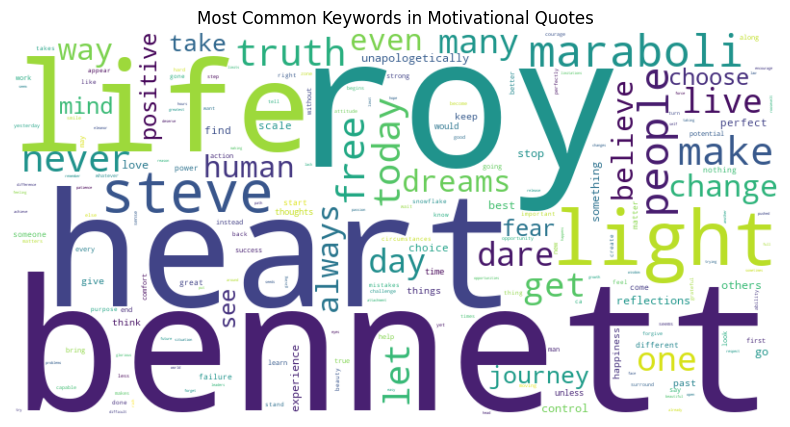

In [84]:

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Motivational Quotes")
plt.show()


In [85]:

author_keywords = {}

for author in data["Author"].unique():
    # Get all quotes by the author
    author_quotes = " ".join(data[data["Author"] == author]["Quote"].tolist())
    
    # Tokenize and filter out stop words
    tokens = word_tokenize(author_quotes)
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    word_counts = Counter(filtered_tokens)
    author_keywords[author] = word_counts.most_common(10)  # Get top 10 keywords per author


for author, keywords in list(author_keywords.items())[:3]:  # Show top 3 authors as a sample
    print(f"Most Common Keywords for {author}:", keywords)


Most Common Keywords for Frank Herbert,: [('fear', 5), ('gone', 2), ('must', 1), ('brings', 1), ('total', 1), ('obliteration', 1), ('face', 1), ('permit', 1), ('pass', 1), ('past', 1)]
Most Common Keywords for Roy T. Bennett,: [('heart', 70), ('light', 67), ('roy', 66), ('bennett', 66), ('life', 17), ('never', 16), ('people', 12), ('mind', 11), ('believe', 11), ('make', 10)]
Most Common Keywords for Roy T. Bennett: [('roy', 15), ('bennett', 15), ('comfort', 6), ('change', 5), ('zone', 4), ('make', 4), ('never', 3), ('end', 3), ('way', 3), ('dreams', 3)]


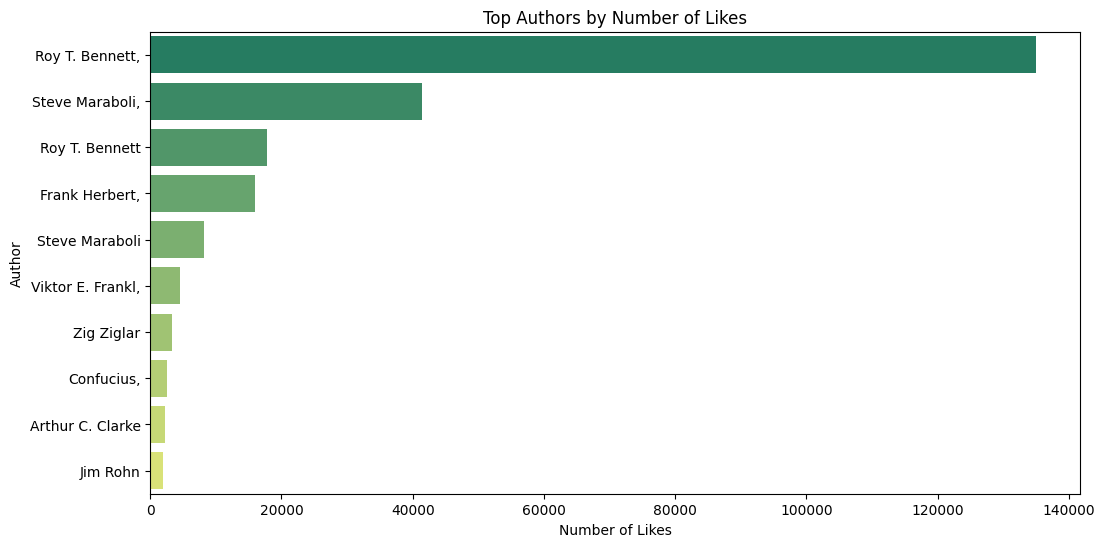

In [86]:

author_likes = data.groupby("Author")["Likes"].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=author_likes.values, y=author_likes.index, palette="summer",hue=author_likes.index)
plt.xlabel("Number of Likes")
plt.ylabel("Author")
plt.title("Top Authors by Number of Likes")
plt.show()


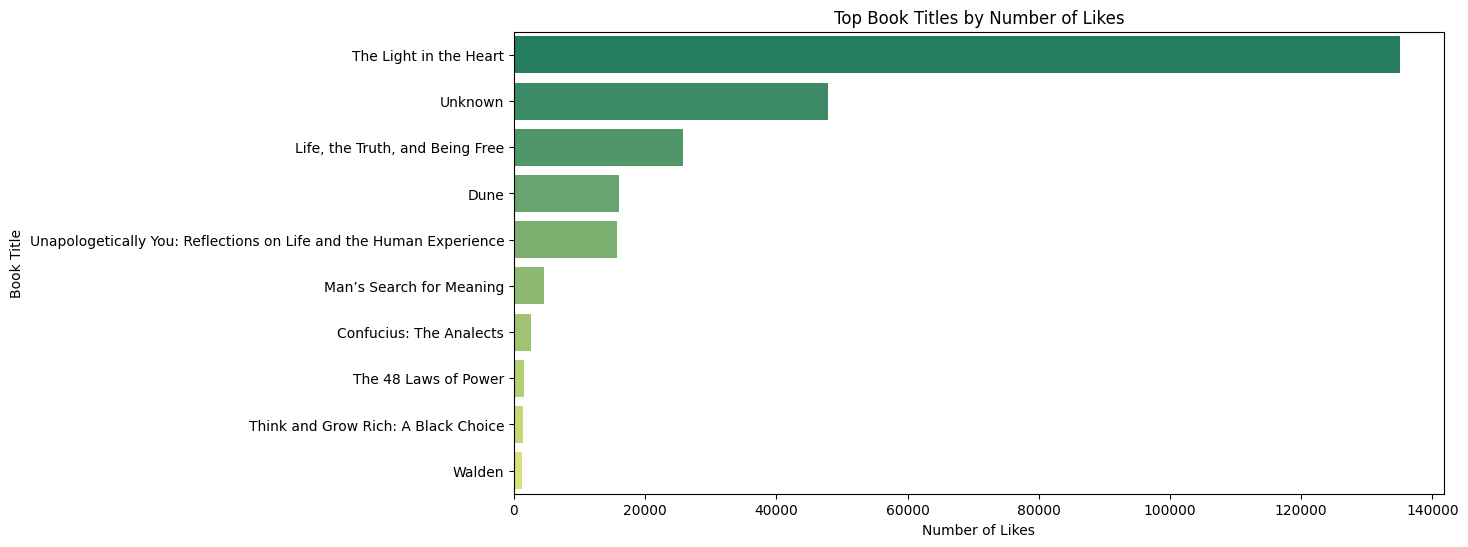

In [87]:

book_likes = data.groupby("Book_Title")["Likes"].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=book_likes.values, y=book_likes.index, palette="summer",hue=book_likes.index)
plt.xlabel("Number of Likes")
plt.ylabel("Book Title")
plt.title("Top Book Titles by Number of Likes")
plt.show()


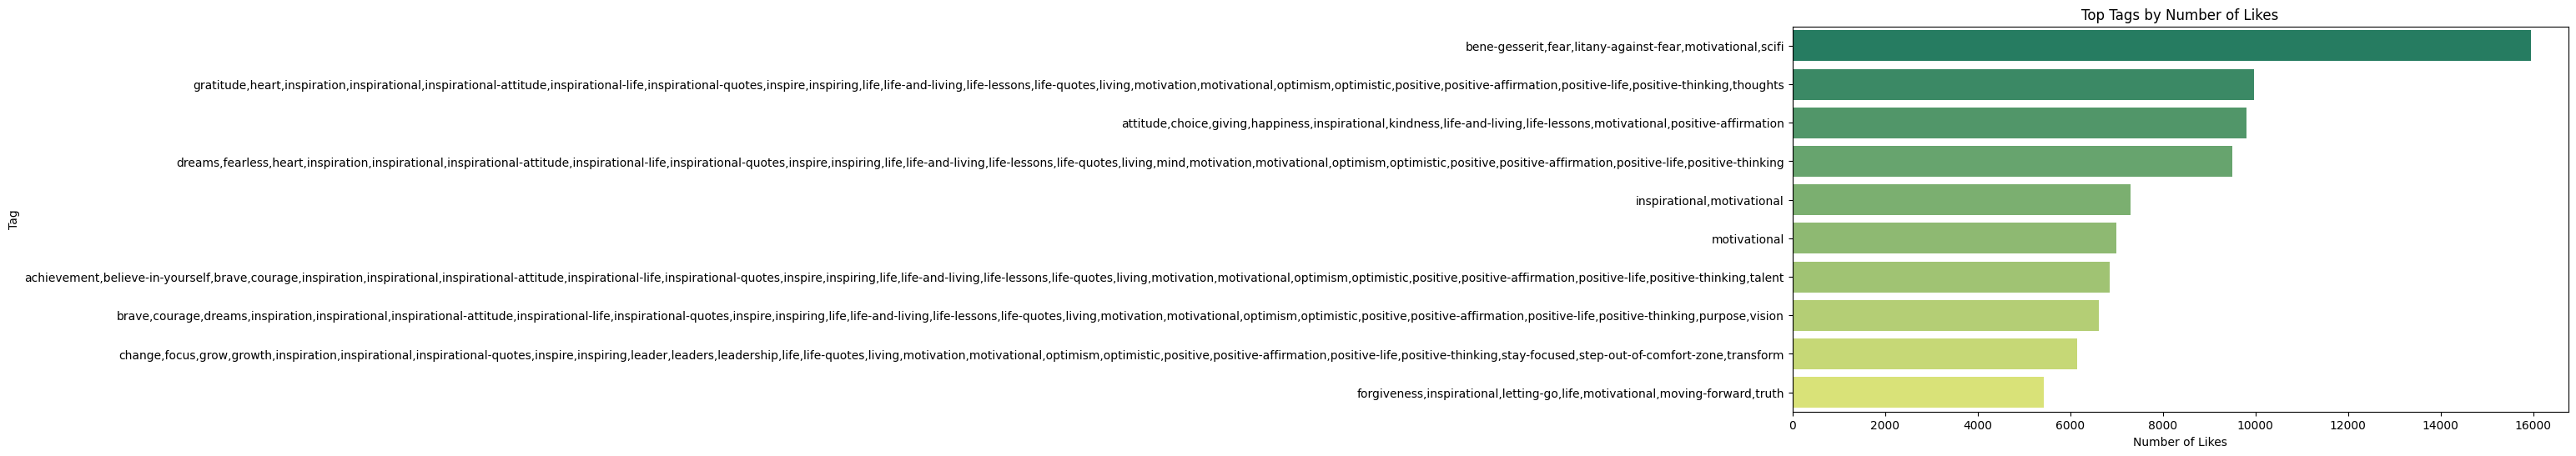

In [88]:

tag_likes = data.groupby("Tags")["Likes"].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=tag_likes.values, y=tag_likes.index, palette="summer",hue=tag_likes.index)
plt.xlabel("Number of Likes")
plt.ylabel("Tag")
plt.title("Top Tags by Number of Likes")
plt.show()
